# Import and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random as rd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import math
from sklearn.linear_model import LinearRegression

# Data Processing

In [2]:
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('project_residential_price_data_optional.csv')
dfs = pd.read_excel('Data Description_optional.xlsx', sheet_name=None)

In [4]:
df_desc = dfs['Descriptions']
df_desc.columns = df_desc.columns.str.strip(' ')
df_desc.columns

Index(['Variable Group', 'Variable ID', 'Descriptions', 'Unit'], dtype='object')

In [5]:
df_desc["Variable ID"] = df_desc["Variable ID"].astype(str).apply(lambda x: x.replace("-", "."))

In [6]:
target_var = np.array(['V.9', 'V.30'])
features_var = np.array(list(set(df.columns) - set(target_var)))
target_var, features_var

(array(['V.9', 'V.30'], dtype='<U4'),
 array(['V.20', 'V.29', 'V.12', 'V.26', 'V.5', 'V.8', 'V.27', 'V.22',
        'V.28', 'V.23', 'V.18', 'V.6', 'V.2', 'V.7', 'V.4', 'V.1', 'V.19',
        'V.13', 'V.14', 'V.10', 'V.11', 'V.3', 'V.25', 'V.15', 'V.24',
        'V.16', 'V.21', 'V.17'], dtype='<U4'))

In [7]:
df

,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.11,V.12,...,V.23,V.24,V.25,V.26,V.27,V.28,V.29,V.9,V.10,V.30
0,1,3150.0,920.0,598.5,190,1010.84,16,1200,6713.00,56.2,...,1755.00,8003.0,67.81,63.25,3758.77,42587.00,628132.9,2200,4,0
1,1,7600.0,1140.0,3040.0,400,963.81,23,2900,3152.00,106.0,...,8842.18,8864.0,105.52,105.32,12113.01,45966.00,1188995.8,5000,3,0
2,1,4800.0,840.0,480.0,100,689.84,15,630,1627.00,41.0,...,1755.00,7773.0,45.91,38.34,1537.96,39066.00,524764.8,1200,2,1
3,1,685.0,202.0,13.7,20,459.54,4,140,2580.93,12.1,...,1612.95,1649.0,11.62,10.06,392.96,8435.75,141542.6,165,2,0
4,1,3000.0,800.0,1230.0,410,631.91,13,5000,6790.00,203.8,...,9248.40,9380.0,158.63,169.50,10082.00,49572.00,2318397.0,5500,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2,1350.0,350.0,108.0,80,251.37,9,830,2700.00,103.0,...,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0,1100,2,1
368,2,600.0,150.0,36.0,60,299.55,6,570,6713.00,59.1,...,7924.48,7994.0,71.56,65.65,4294.06,10927.50,648845.6,740,2,1
369,2,1900.0,430.0,285.0,150,364.41,7,640,2918.00,120.2,...,9063.61,9078.0,112.15,115.70,10304.20,35322.00,1181856.2,860,3,0
370,2,510.0,160.0,30.6,60,245.28,9,790,2247.00,76.9,...,8271.46,8325.0,85.37,82.89,8993.00,22417.50,833494.6,1100,2,1


# Preprocessing

In [8]:
def OneHotEncoding(df, categorical_features):
    df_onehot = df.copy()
    df_onehot = pd.get_dummies(df_onehot, columns=categorical_features)
    
    return df_onehot

In [9]:
def TrainTestSplit(df, target_var_list, target_var, test_size=0.2, random_state=1):
    df_features = df.drop(target_var_list, axis = 1)
    df_target = df[target_var]
    train_features, test_features, train_target, test_target = train_test_split(
        df_features, 
        df_target, 
        test_size = test_size, 
        random_state = random_state)
    
    print("train_features shape: ",train_features.shape)
    print("test_features shape: ", test_features.shape)
    print("train_target shape: ",train_target.shape)
    print("test_target shape: ", test_target.shape)
    
    return train_features, test_features, train_target, test_target

In [10]:
def FeatureScaling(train_features, test_features):

    s = (train_features.max()> 1) | (train_features.min() < 0)
    scale_cols = list(s[s].index)

    scaler = StandardScaler()
    train_features_scaled = train_features.copy()
    test_features_scaled = test_features.copy()

    train_features_scaled[scale_cols] = scaler.fit_transform(train_features[scale_cols])
    test_features_scaled[scale_cols] = scaler.transform(test_features[scale_cols])
    
    print('test_features_scaled describe:')
    display(test_features_scaled.describe())

    return train_features_scaled, test_features_scaled


In [11]:
categorical_features = ['V.1' , 'V.10']
df_onehot = OneHotEncoding(df, categorical_features)
df_onehot.head()

,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.11,V.12,V.13,...,V.28,V.29,V.9,V.30,V.1_1,V.1_2,V.10_1,V.10_2,V.10_3,V.10_4
0,3150.0,920.0,598.5,190,1010.84,16,1200,6713.00,56.2,61.52,...,42587.00,628132.9,2200,0,1,0,0,0,0,1
1,7600.0,1140.0,3040.0,400,963.81,23,2900,3152.00,106.0,103.03,...,45966.00,1188995.8,5000,0,1,0,0,0,1,0
2,4800.0,840.0,480.0,100,689.84,15,630,1627.00,41.0,41.25,...,39066.00,524764.8,1200,1,1,0,0,1,0,0
3,685.0,202.0,13.7,20,459.54,4,140,2580.93,12.1,10.03,...,8435.75,141542.6,165,0,1,0,0,1,0,0
4,3000.0,800.0,1230.0,410,631.91,13,5000,6790.00,203.8,162.84,...,49572.00,2318397.0,5500,1,1,0,0,0,0,1


In [12]:
target_var_list = ['V.9', 'V.30']
target_var = ['V.9']

In [13]:
train_features, test_features, train_target, test_target = TrainTestSplit(df_onehot,target_var_list,target_var)

train_features shape:  (297, 32)
test_features shape:  (75, 32)
train_target shape:  (297, 1)
test_target shape:  (75, 1)


In [14]:
train_features_scaled, test_features_scaled = FeatureScaling(train_features, test_features)

test_features_scaled describe:


,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.11,V.12,V.13,...,V.26,V.27,V.28,V.29,V.1_1,V.1_2,V.10_1,V.10_2,V.10_3,V.10_4
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.449156,0.456609,0.477477,0.317517,-0.091509,0.079810,0.255170,-0.081452,0.251107,0.238694,...,0.249083,0.254750,0.186848,0.249938,0.506667,0.493333,0.106667,0.373333,0.346667,0.173333
std,1.854347,1.954292,2.095682,1.225770,0.668013,0.986687,1.296558,0.864032,1.040899,1.016205,...,1.014907,0.998440,0.981950,1.060464,0.503322,0.503322,0.310768,0.486947,0.479113,0.381084
min,-0.907140,-0.800157,-0.629822,-1.372803,-1.258188,-1.538497,-1.032450,-1.434407,-1.240417,-1.419598,...,-1.412310,-1.415628,-1.375224,-1.202179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.568659,-0.465042,-0.493479,-0.575187,-0.647650,-0.586552,-0.586256,-0.725962,-0.675682,-0.573148,...,-0.688586,-0.888021,-0.593690,-0.666163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.038713,-0.001037,-0.152506,0.128592,-0.111771,-0.110579,-0.215323,-0.335797,0.188741,0.329652,...,0.338890,0.737101,0.300138,0.092522,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.669021,0.643414,0.642324,0.926207,0.553902,0.365393,0.601804,0.567456,0.743004,0.819434,...,0.834557,0.939892,1.229085,1.045006,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,9.623397,11.882646,16.077171,4.538938,1.546338,3.697201,5.009988,1.621616,2.844045,2.844097,...,2.608942,1.706649,1.570343,2.289803,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
train_features_scaled

,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.11,V.12,V.13,...,V.26,V.27,V.28,V.29,V.1_1,V.1_2,V.10_1,V.10_2,V.10_3,V.10_4
343,-0.537888,-0.361930,-0.590104,-1.091291,-0.980349,-0.586552,-0.505618,-0.313298,-0.724825,-0.682578,...,-0.773632,-0.990087,0.897626,-0.611348,0,1,0,1,0,0
186,-0.729352,-0.645489,-0.320670,1.160800,-0.059620,0.365393,0.816837,1.538754,1.107141,1.136087,...,1.058035,0.687311,-1.108060,1.161510,1,0,0,0,1,0
27,0.788686,0.566080,0.165008,-0.246757,1.224378,-0.110579,0.279254,-0.564079,-0.753827,-0.732801,...,-0.831889,-1.094224,-0.551618,-0.713085,1,0,0,0,1,0
290,-0.749866,-0.722823,-0.607292,-0.997454,-0.342673,1.317338,-0.946437,-0.220009,-0.932673,-1.003110,...,-1.117715,-1.072170,-1.317681,-0.967282,0,1,0,1,0,0
73,0.392082,0.230965,0.594709,0.879289,1.012276,-0.110579,0.494287,-0.308908,-0.081945,-0.050700,...,0.103137,1.181753,1.229085,-0.130455,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.886626,-0.800157,-0.588710,-0.434431,-0.079451,1.317338,-0.398101,1.402114,-0.462194,-0.305084,...,-0.296865,-0.386234,-0.426411,-0.547316,0,1,0,0,1,0
255,-0.599430,-0.516598,-0.280719,0.691615,-0.704433,-0.110579,0.171737,1.398821,1.812859,1.575033,...,1.656187,0.874588,1.570343,2.102403,0,1,0,1,0,0
72,-0.148121,-0.078371,-0.408933,-0.715943,0.604097,-0.586552,-0.441108,-0.220009,-0.932673,-1.003110,...,-1.117715,-1.072170,-1.317681,-0.967282,1,0,0,0,1,0
235,-0.455832,-0.387708,-0.557353,-0.997454,-0.159667,-0.110579,-0.881927,-0.951501,-1.037403,-1.169706,...,-1.262480,-1.038805,-1.337762,-0.947935,0,1,0,1,0,0


# 1. Models for regression

In [16]:
from sklearn.kernel_ridge import KernelRidge

In [17]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [18]:
def prediction_graph(y_train, y_hat_train, y_test, y_hat_test, output):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))

    sns.scatterplot(
        x=y_train,
        y=y_hat_train,
        ax=ax[0],
        alpha =0.5
    )

    sns.scatterplot(
        x=y_test,
        y=y_hat_test,
        ax=ax[1],
        alpha=0.5
    )

    for a in ax:
        a.set_xlabel(f'{output} (true)')
        a.set_ylabel(f'{output} (predict)')
        #a.set_xlim(0, 0)
        #a.set_ylim(90, 90)
        a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')



    ax[0].set_title('Train set')
    ax[1].set_title('Test set')

    fig.tight_layout()
    plt.show()



In [19]:
def PrintPerformance(algo, train_features, train_target, test_features, test_target, display = True):
    scorer = make_scorer(mean_squared_error, squared=False)
    #scorer = make_scorer(r2_score)
    cv_score = cross_val_score(algo, train_features, train_target.iloc[:,0], cv=10, scoring = scorer)
    #print(cv_score)
    print ("Ten-fold Cross Validation Results=", "%.4f" % np.mean(cv_score)) 
    
    y_hat_train = algo.predict(train_features)
    y_hat_test = algo.predict(test_features)

    print(
        f'RMSE: {rmse(train_target, y_hat_train)} (Train) {rmse(test_target, y_hat_test)} (Test)'
    )
    if display:
        prediction_graph(train_target.iloc[:, 0], y_hat_train, test_target.iloc[:, 0], y_hat_test, 'V.9')
    
    return np.mean(cv_score)

## Linear KernelRidge

Ten-fold Cross Validation Results= 158.2652
RMSE: 140.72176410681314 (Train) 319.4853739049384 (Test)


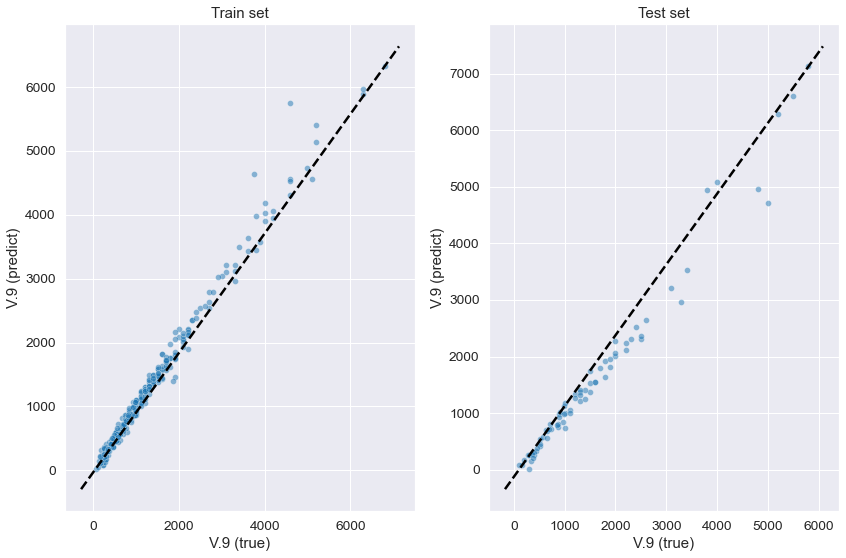

158.265247947195

In [20]:
linear_kernel = KernelRidge( kernel = 'linear')
linear_kernel.fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(linear_kernel, train_features_scaled, train_target, test_features_scaled, test_target)

## Poly kernelridge

Ten-fold Cross Validation Results= 197.4052
RMSE: 92.79290812422582 (Train) 417.2485334668635 (Test)


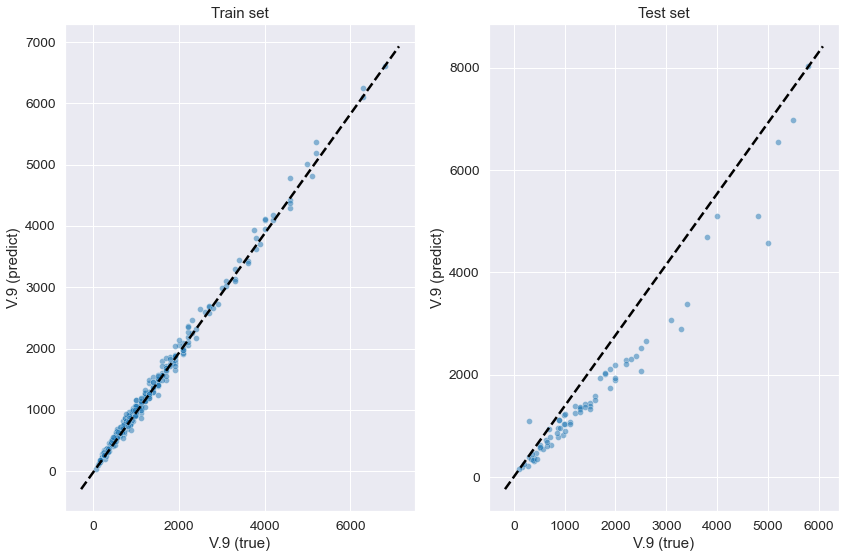

197.40522293411362

In [21]:
poly_kernel = KernelRidge( kernel = 'poly')
poly_kernel.fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(poly_kernel, train_features_scaled, train_target, test_features_scaled, test_target)


## Rbf Kernelridge

Ten-fold Cross Validation Results= 427.5954
RMSE: 308.1450477282373 (Train) 745.2940741943667 (Test)


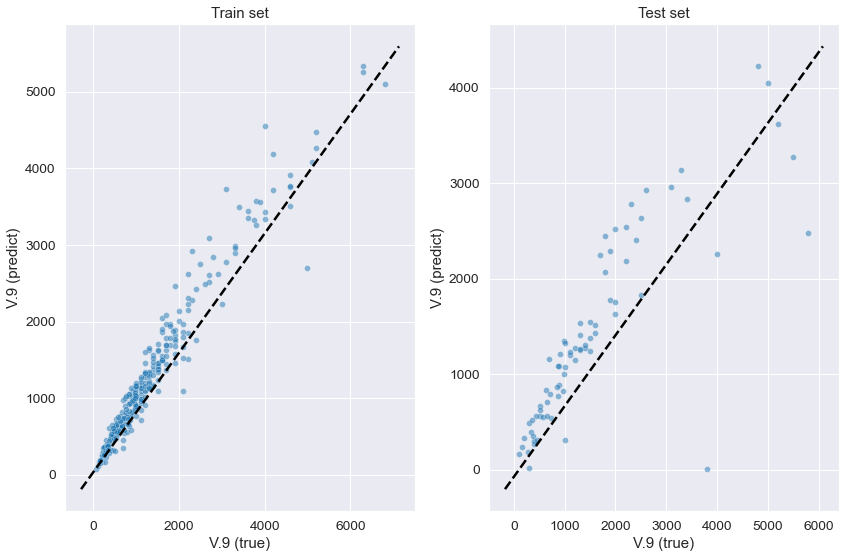

427.59536320340266

In [22]:
rbf_kernel = KernelRidge( kernel = 'rbf')
rbf_kernel.fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(rbf_kernel, train_features_scaled, train_target, test_features_scaled, test_target)

## SVM regression

In [23]:
from sklearn.svm import SVR

Ten-fold Cross Validation Results= 770.6402
RMSE: 787.6902617789463 (Train) 827.311384918436 (Test)


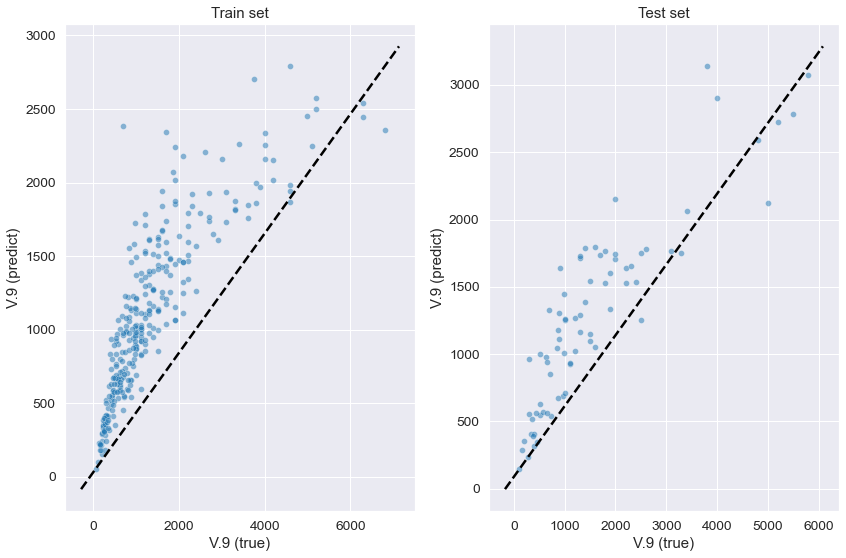

770.640239201258

In [24]:
svr = SVR(kernel = 'linear')
svr.fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(svr , train_features_scaled, train_target, test_features_scaled, test_target)

## Decision tree regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

Ten-fold Cross Validation Results= 296.9643
RMSE: 0.0 (Train) 338.2149218076182 (Test)


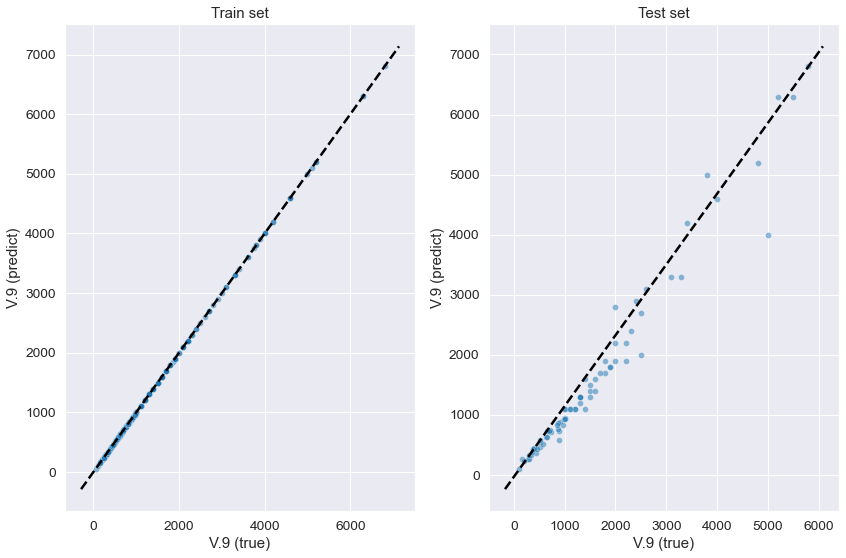

296.96426263760577

In [26]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(dtr , train_features_scaled, train_target, test_features_scaled, test_target)

## Random forest regression

In [27]:
from sklearn.ensemble import RandomForestRegressor

Ten-fold Cross Validation Results= 244.5373
RMSE: 91.08164604239015 (Train) 258.6944538124722 (Test)


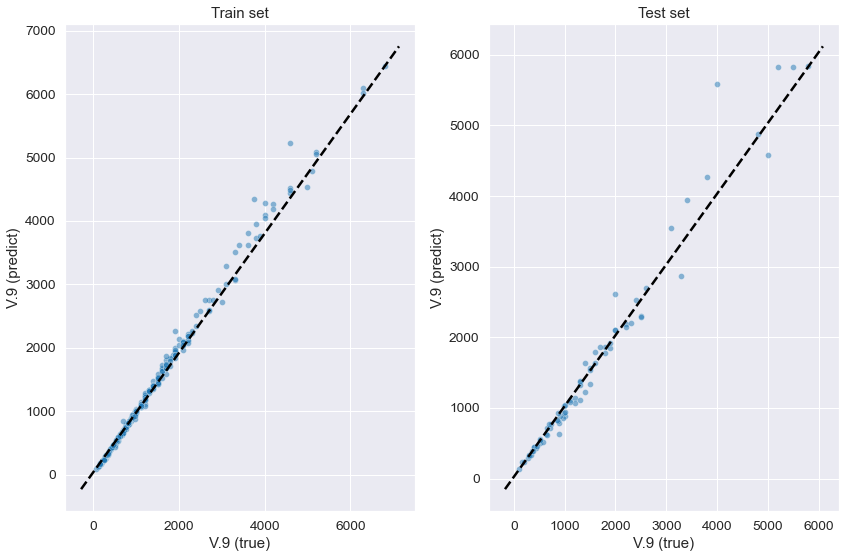

244.5373150160978

In [28]:
rfr = RandomForestRegressor(random_state=0)
rfr .fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(rfr , train_features_scaled, train_target, test_features_scaled, test_target)

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)

Ten-fold Cross Validation Results= 169.1533
RMSE: 29.360107881360005 (Train) 227.77146119404938 (Test)


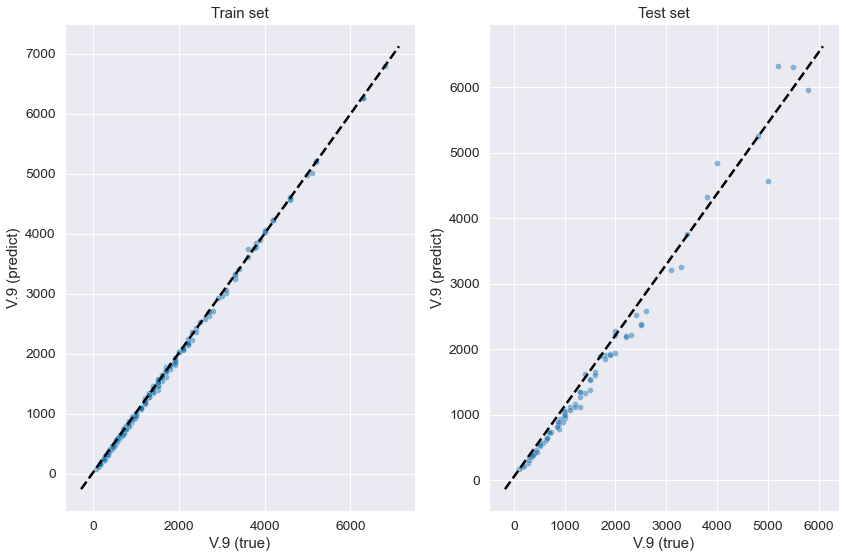

169.1533417827656

In [30]:
gbr.fit(train_features_scaled, train_target.iloc[:, 0])

PrintPerformance(gbr, train_features_scaled, train_target, test_features_scaled, test_target)

## 2. PCA Analysis

In [31]:
# First ignroe all categorical variables
train_features_scaled.iloc[:,:-6]

,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.11,V.12,V.13,...,V.20,V.21,V.22,V.23,V.24,V.25,V.26,V.27,V.28,V.29
343,-0.537888,-0.361930,-0.590104,-1.091291,-0.980349,-0.586552,-0.505618,-0.313298,-0.724825,-0.682578,...,0.609157,-0.759255,-0.691718,-1.139939,0.339023,-0.692365,-0.773632,-0.990087,0.897626,-0.611348
186,-0.729352,-0.645489,-0.320670,1.160800,-0.059620,0.365393,0.816837,1.538754,1.107141,1.136087,...,-2.032004,1.358287,1.182769,0.975333,0.771645,1.109420,1.058035,0.687311,-1.108060,1.161510
27,0.788686,0.566080,0.165008,-0.246757,1.224378,-0.110579,0.279254,-0.564079,-0.753827,-0.732801,...,0.609157,-0.780299,-0.792150,-1.139939,0.645667,-0.787797,-0.831889,-1.094224,-0.551618,-0.713085
290,-0.749866,-0.722823,-0.607292,-0.997454,-0.342673,1.317338,-0.946437,-0.220009,-0.932673,-1.003110,...,0.609157,-1.225131,-0.884922,-1.139939,-1.449079,-1.124230,-1.117715,-1.072170,-1.317681,-0.967282
73,0.392082,0.230965,0.594709,0.879289,1.012276,-0.110579,0.494287,-0.308908,-0.081945,-0.050700,...,0.609157,-0.161767,-0.104657,0.724438,0.325840,0.106498,0.103137,1.181753,1.229085,-0.130455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.886626,-0.800157,-0.588710,-0.434431,-0.079451,1.317338,-0.398101,1.402114,-0.462194,-0.305084,...,-0.051134,-0.461034,-0.537771,0.601988,0.135897,-0.275672,-0.296865,-0.386234,-0.426411,-0.547316
255,-0.599430,-0.516598,-0.280719,0.691615,-0.704433,-0.110579,0.171737,1.398821,1.812859,1.575033,...,-2.032004,1.692666,1.844090,0.973674,0.807778,1.594719,1.656187,0.874588,1.570343,2.102403
72,-0.148121,-0.078371,-0.408933,-0.715943,0.604097,-0.586552,-0.441108,-0.220009,-0.932673,-1.003110,...,0.609157,-1.225131,-0.884922,-1.139939,-1.449079,-1.124230,-1.117715,-1.072170,-1.317681,-0.967282
235,-0.455832,-0.387708,-0.557353,-0.997454,-0.159667,-0.110579,-0.881927,-0.951501,-1.037403,-1.169706,...,0.609157,-1.106424,-1.008122,-1.140878,-1.722520,-1.234835,-1.262480,-1.038805,-1.337762,-0.947935


In [32]:
from sklearn.decomposition import PCA

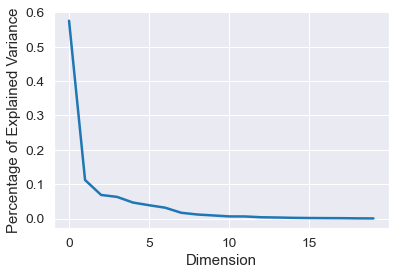

In [33]:
pca = PCA(n_components=20)
pca.fit(train_features_scaled.iloc[:,:-6])
plt.plot(pca.explained_variance_ratio_)
plt.xlabel(r'Dimension')
plt.ylabel(r'Percentage of Explained Variance');

In [34]:
n_components = 10

## Choose first n_components=10 Principal Components

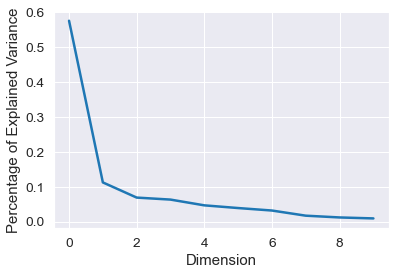

In [35]:
pca_final = PCA(n_components = n_components)
pca_final.fit(train_features_scaled.iloc[:,:-6])
plt.plot(pca_final.explained_variance_ratio_)
plt.xlabel(r'Dimension')
plt.ylabel(r'Percentage of Explained Variance');

Text(0.5, 1.0, 'Third Principal Component Axis')

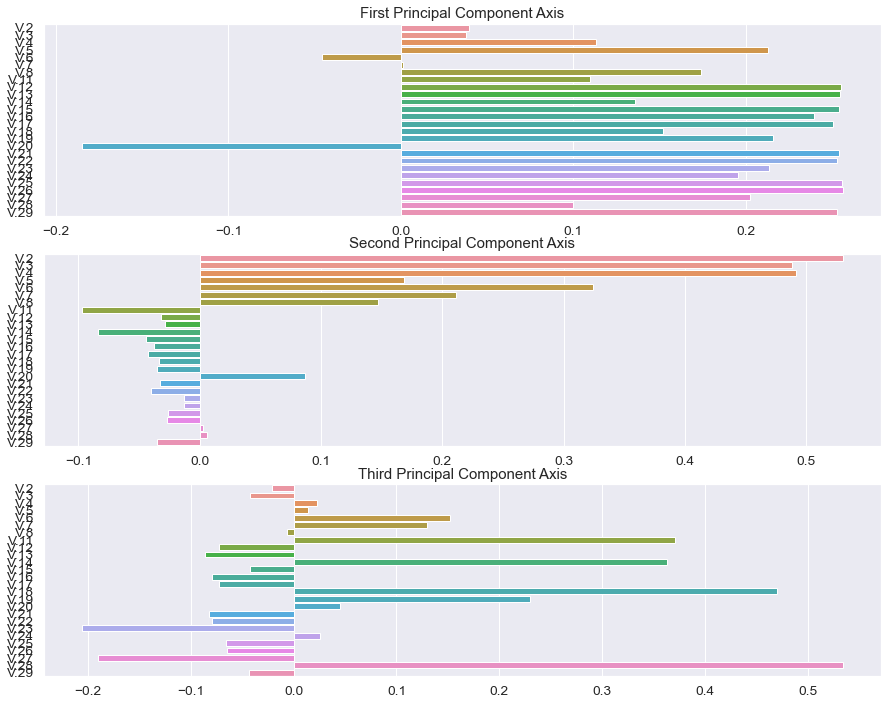

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
sns.barplot(x=pca_final.components_[0], y=train_features_scaled.iloc[:,:-6].columns, orient='h', ax=ax[0])
sns.barplot(x=pca_final.components_[1], y=train_features_scaled.iloc[:,:-6].columns, orient='h', ax=ax[1])
sns.barplot(x=pca_final.components_[2], y=train_features_scaled.iloc[:,:-6].columns, orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

In [37]:
latents_train = pca_final.transform(train_features_scaled.iloc[:,:-6])
latents_test = pca_final.transform(test_features_scaled.iloc[:,:-6])
latents_train_df = pd.DataFrame(latents_train, columns = ['PC'+str(i) for i in range(1,n_components+1)])
latents_test_df = pd.DataFrame(latents_test, columns =['PC'+str(i) for i in range(1,n_components+1)])

In [38]:
latent_train_features = pd.concat([latents_train_df, train_features_scaled.iloc[:,-6:].reset_index(drop=True)], axis=1)
latent_test_features = pd.concat([latents_test_df, test_features_scaled.iloc[:,-6:].reset_index(drop=True)], axis=1)

# Try Top 10 PC + Categorical Variables on various models

In [39]:
models = {'Linear model':LinearRegression(),
                'Poly KernelRidge':KernelRidge( kernel = 'poly'),
                'RBF KernelRidge':KernelRidge( kernel = 'rbf'),
                'SVM Regression': SVR(kernel = 'linear'),
                'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
                'Random Forest Regressor(Ensemble)':RandomForestRegressor(random_state=0),
                'Gradient Boosting(Ensemble)': GradientBoostingRegressor(random_state=0)}


Linear model
Ten-fold Cross Validation Results= 232.2303
RMSE: 218.2897663223253 (Train) 463.3566672796382 (Test)


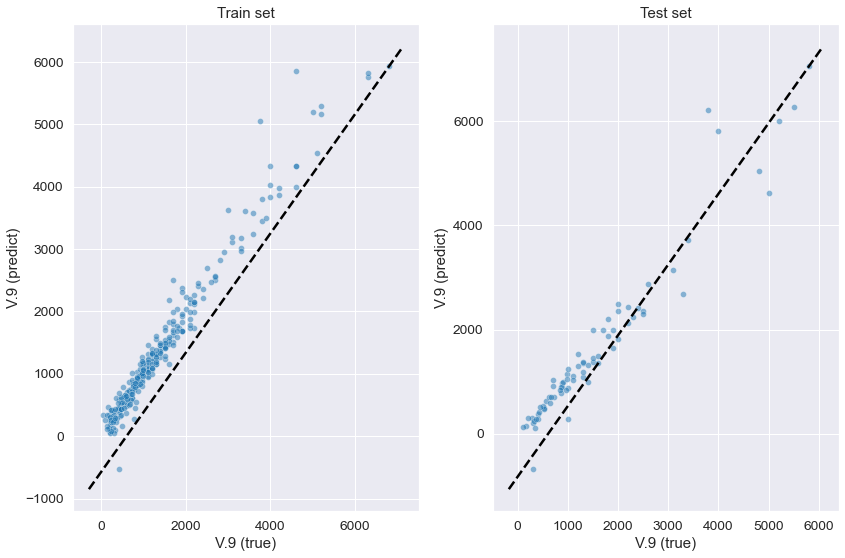

Poly KernelRidge
Ten-fold Cross Validation Results= 212.8763
RMSE: 70.30646293695848 (Train) 579.7369435547103 (Test)


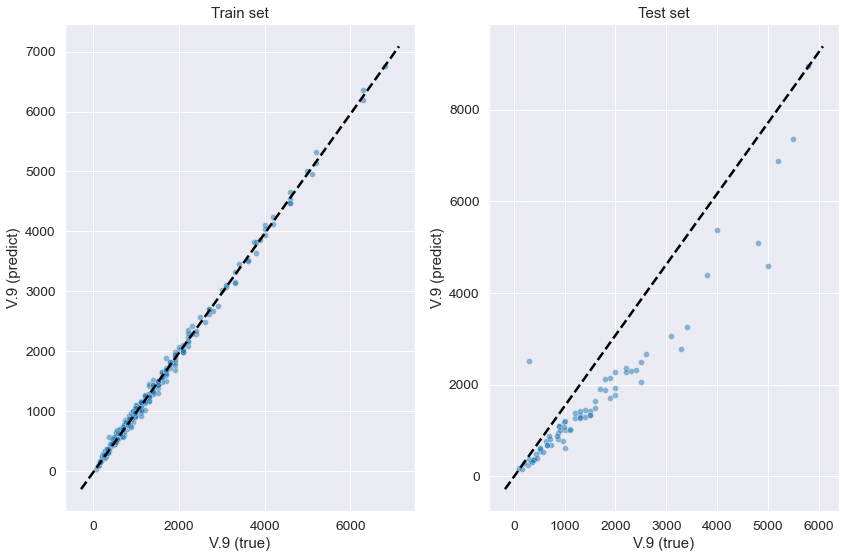

RBF KernelRidge
Ten-fold Cross Validation Results= 546.2154
RMSE: 358.22913095701875 (Train) 971.454182875907 (Test)


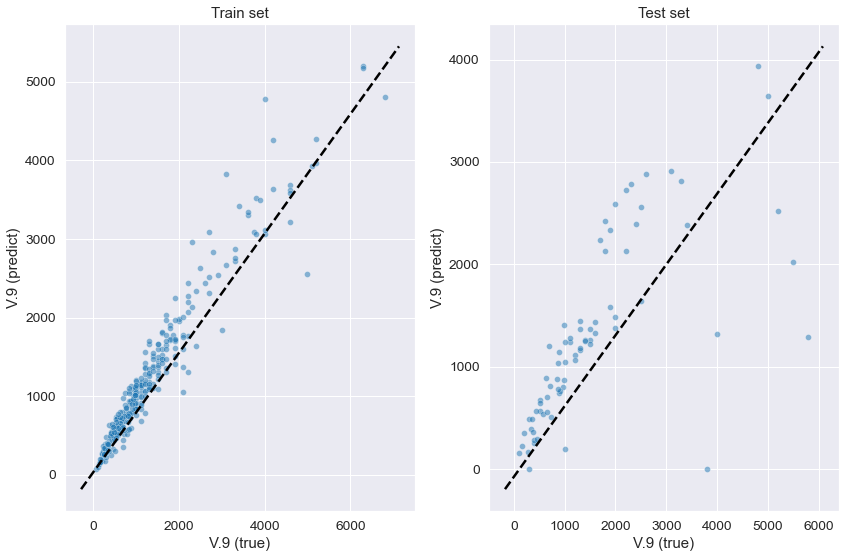

SVM Regression
Ten-fold Cross Validation Results= 770.5172
RMSE: 787.3856724489958 (Train) 823.8786368022892 (Test)


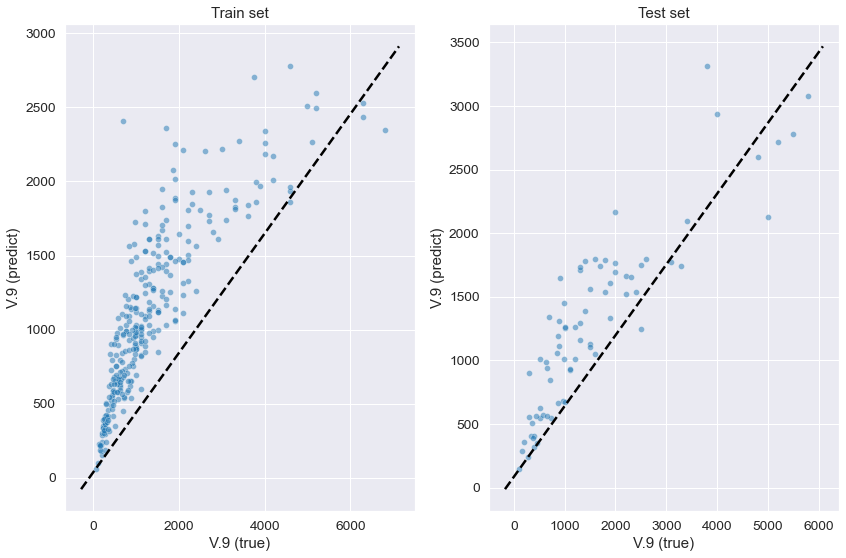

Decision Tree Regressor
Ten-fold Cross Validation Results= 396.8540
RMSE: 0.0 (Train) 444.1805188584179 (Test)


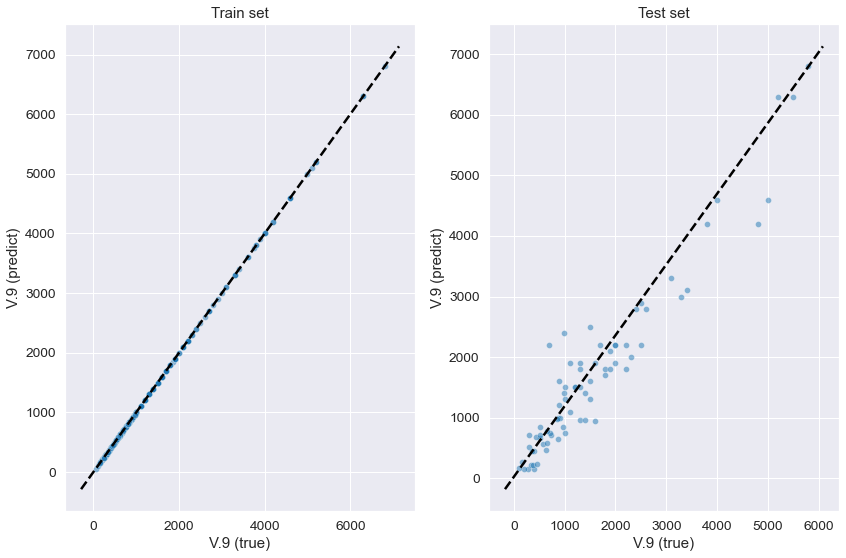

Random Forest Regressor(Ensemble)
Ten-fold Cross Validation Results= 293.5843
RMSE: 130.17042160804488 (Train) 285.13959429257335 (Test)


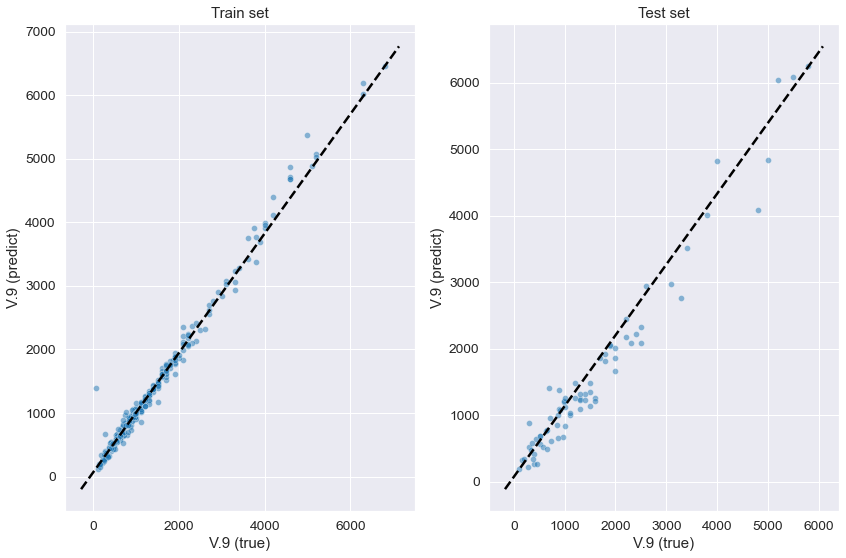

Gradient Boosting(Ensemble)
Ten-fold Cross Validation Results= 259.1861
RMSE: 72.63401267964986 (Train) 264.2287658272709 (Test)


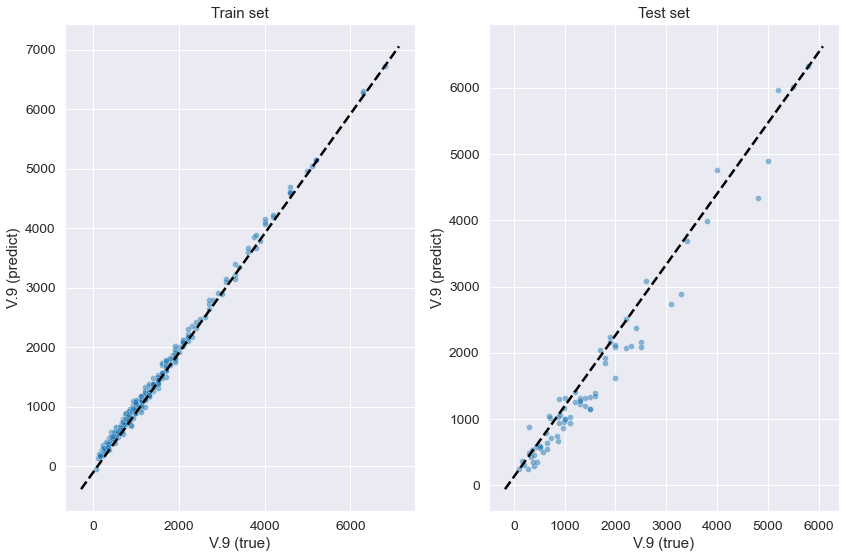

[232.23030407648167, 212.8762807580778, 546.2153597884856, 770.5171774469484, 396.8539661041638, 293.5843415846848, 259.18608507505905]


In [40]:
cv_results = []
for name,model in models.items():
    print(name)
    model.fit(latent_train_features, train_target.iloc[:, 0])
    cv_results.append(PrintPerformance(model, latent_train_features , train_target,latent_test_features, test_target, True))

print(cv_results)
    

## Best model using top10 PC and Categorical Variables

Ten-fold Cross Validation Results= 232.2303
RMSE: 218.2897663223253 (Train) 463.3566672796382 (Test)


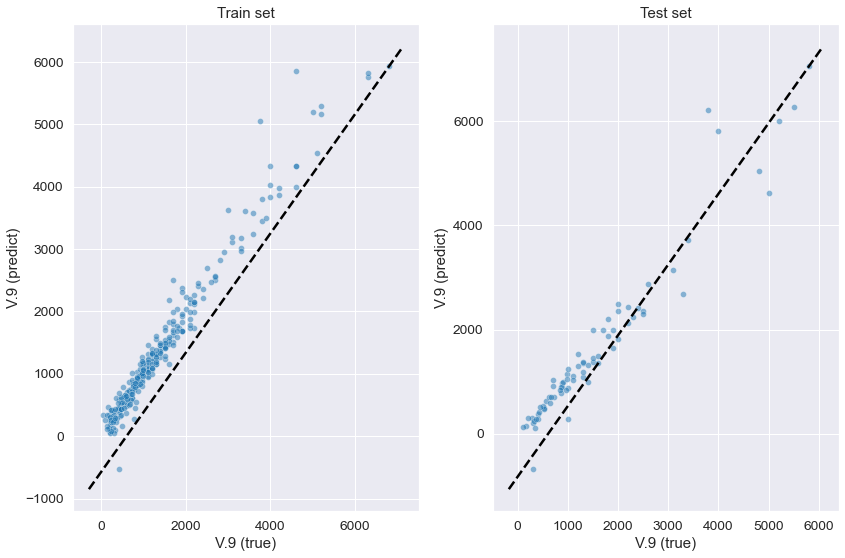

232.23030407648167

In [41]:
lm = LinearRegression()
lm.fit(latent_train_features, train_target.iloc[:, 0])

PrintPerformance(lm, latent_train_features , train_target,latent_test_features, test_target)

# 3. Filtered Variables based on Part1 Descriptive Analysis and Part2 Hypothesis Testing

In [42]:
# V.1 + V.2 + V.3 + V.4 + V.5 + V.6 + V.7 + V.8 + V.12 + V.13 + V.15 + V.17 + V.19 + V.20 + V.21 + V.25 + V.26 + V.27 + V.10
selected_str = 'V.1 + V.2 + V.3 + V.4 + V.5 + V.6 + V.7 + V.8 + V.12 + V.13 + V.15 + V.17 + V.19 + V.20 + V.21 + V.25 + V.26 + V.27 + V.10 + V.9 + V.30'
selected_variables = [var.strip() for var in selected_str.strip().split('+')]
selected_variables.sort(key=lambda x:int(x.split('.')[1]))

In [43]:
selected_variables

['V.1',
 'V.2',
 'V.3',
 'V.4',
 'V.5',
 'V.6',
 'V.7',
 'V.8',
 'V.9',
 'V.10',
 'V.12',
 'V.13',
 'V.15',
 'V.17',
 'V.19',
 'V.20',
 'V.21',
 'V.25',
 'V.26',
 'V.27',
 'V.30']

In [44]:
df_filted = df[selected_variables]

In [45]:
categorical_features = ['V.1' , 'V.10']
df_filtered_onehot = OneHotEncoding(df_filted, categorical_features)
df_filtered_onehot.head()

,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.12,V.13,...,V.25,V.26,V.27,V.30,V.1_1,V.1_2,V.10_1,V.10_2,V.10_3,V.10_4
0,3150.0,920.0,598.5,190,1010.84,16,1200,2200,56.2,61.52,...,67.81,63.25,3758.77,0,1,0,0,0,0,1
1,7600.0,1140.0,3040.0,400,963.81,23,2900,5000,106.0,103.03,...,105.52,105.32,12113.01,0,1,0,0,0,1,0
2,4800.0,840.0,480.0,100,689.84,15,630,1200,41.0,41.25,...,45.91,38.34,1537.96,1,1,0,0,1,0,0
3,685.0,202.0,13.7,20,459.54,4,140,165,12.1,10.03,...,11.62,10.06,392.96,0,1,0,0,1,0,0
4,3000.0,800.0,1230.0,410,631.91,13,5000,5500,203.8,162.84,...,158.63,169.50,10082.00,1,1,0,0,0,0,1


In [46]:
target_var_list = ['V.9', 'V.30']
target_var = ['V.9']

In [47]:
train_features_filtered, test_features_filtered, train_target_filtered, test_target_filtered = TrainTestSplit(df_filtered_onehot,target_var_list,target_var)

train_features shape:  (297, 23)
test_features shape:  (75, 23)
train_target shape:  (297, 1)
test_target shape:  (75, 1)


In [48]:
train_features_filtered_scaled, test_features_filtered_scaled = FeatureScaling(train_features_filtered, test_features_filtered)

test_features_scaled describe:


,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.12,V.13,V.15,...,V.21,V.25,V.26,V.27,V.1_1,V.1_2,V.10_1,V.10_2,V.10_3,V.10_4
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.449156,0.456609,0.477477,0.317517,-0.091509,0.079810,0.255170,0.251107,0.238694,0.235612,...,0.256750,0.247947,0.249083,0.254750,0.506667,0.493333,0.106667,0.373333,0.346667,0.173333
std,1.854347,1.954292,2.095682,1.225770,0.668013,0.986687,1.296558,1.040899,1.016205,1.046086,...,1.022228,1.007944,1.014907,0.998440,0.503322,0.503322,0.310768,0.486947,0.479113,0.381084
min,-0.907140,-0.800157,-0.629822,-1.372803,-1.258188,-1.538497,-1.032450,-1.240417,-1.419598,-1.062779,...,-1.276869,-1.564012,-1.412310,-1.415628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.568659,-0.465042,-0.493479,-0.575187,-0.647650,-0.586552,-0.586256,-0.675682,-0.573148,-0.754928,...,-0.628108,-0.628706,-0.688586,-0.888021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.038713,-0.001037,-0.152506,0.128592,-0.111771,-0.110579,-0.215323,0.188741,0.329652,0.018926,...,0.145871,0.327488,0.338890,0.737101,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.669021,0.643414,0.642324,0.926207,0.553902,0.365393,0.601804,0.743004,0.819434,0.830716,...,0.827419,0.819384,0.834557,0.939892,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,9.623397,11.882646,16.077171,4.538938,1.546338,3.697201,5.009988,2.844045,2.844097,2.806536,...,3.115104,2.540908,2.608942,1.706649,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
train_features_filtered_scaled

,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.12,V.13,V.15,...,V.21,V.25,V.26,V.27,V.1_1,V.1_2,V.10_1,V.10_2,V.10_3,V.10_4
343,-0.537888,-0.361930,-0.590104,-1.091291,-0.980349,-0.586552,-0.505618,-0.724825,-0.682578,-0.791000,...,-0.759255,-0.692365,-0.773632,-0.990087,0,1,0,1,0,0
186,-0.729352,-0.645489,-0.320670,1.160800,-0.059620,0.365393,0.816837,1.107141,1.136087,1.356356,...,1.358287,1.109420,1.058035,0.687311,1,0,0,0,1,0
27,0.788686,0.566080,0.165008,-0.246757,1.224378,-0.110579,0.279254,-0.753827,-0.732801,-0.821192,...,-0.780299,-0.787797,-0.831889,-1.094224,1,0,0,0,1,0
290,-0.749866,-0.722823,-0.607292,-0.997454,-0.342673,1.317338,-0.946437,-0.932673,-1.003110,-0.936070,...,-1.225131,-1.124230,-1.117715,-1.072170,0,1,0,1,0,0
73,0.392082,0.230965,0.594709,0.879289,1.012276,-0.110579,0.494287,-0.081945,-0.050700,-0.166629,...,-0.161767,0.106498,0.103137,1.181753,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.886626,-0.800157,-0.588710,-0.434431,-0.079451,1.317338,-0.398101,-0.462194,-0.305084,-0.468449,...,-0.461034,-0.275672,-0.296865,-0.386234,0,1,0,0,1,0
255,-0.599430,-0.516598,-0.280719,0.691615,-0.704433,-0.110579,0.171737,1.812859,1.575033,1.915866,...,1.692666,1.594719,1.656187,0.874588,0,1,0,1,0,0
72,-0.148121,-0.078371,-0.408933,-0.715943,0.604097,-0.586552,-0.441108,-0.932673,-1.003110,-0.936070,...,-1.225131,-1.124230,-1.117715,-1.072170,1,0,0,0,1,0
235,-0.455832,-0.387708,-0.557353,-0.997454,-0.159667,-0.110579,-0.881927,-1.037403,-1.169706,-0.991718,...,-1.106424,-1.234835,-1.262480,-1.038805,0,1,0,1,0,0


### Try on all previous models

In [50]:
models = {'Linear model':LinearRegression(),
                'Poly KernelRidge':KernelRidge( kernel = 'poly'),
                'RBF KernelRidge':KernelRidge( kernel = 'rbf'),
                'SVM Regression': SVR(kernel = 'linear'),
                'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
                'Random Forest Regressor(Ensemble)':RandomForestRegressor(random_state=0),
                'Gradient Boosting(Ensemble)': GradientBoostingRegressor(random_state=0)}


In [51]:
cv_results = []
for name,model in models.items():
    print(name)
    model.fit(train_features_filtered_scaled, train_target_filtered.iloc[:, 0])
    cv_results.append(PrintPerformance(model, train_features_filtered_scaled , train_target_filtered,test_features_filtered_scaled, test_target_filtered, False))

print(cv_results)
    

Linear model
Ten-fold Cross Validation Results= 145.1876
RMSE: 131.24785313154325 (Train) 310.02928441256745 (Test)
Poly KernelRidge
Ten-fold Cross Validation Results= 206.0682
RMSE: 85.90867180696146 (Train) 289.34030818309594 (Test)
RBF KernelRidge
Ten-fold Cross Validation Results= 397.3925
RMSE: 286.92096245770915 (Train) 751.2501079261198 (Test)
SVM Regression
Ten-fold Cross Validation Results= 766.0251
RMSE: 780.5940293751087 (Train) 812.4988867726852 (Test)
Decision Tree Regressor
Ten-fold Cross Validation Results= 309.6575
RMSE: 0.0 (Train) 426.39262032388257 (Test)
Random Forest Regressor(Ensemble)
Ten-fold Cross Validation Results= 241.2995
RMSE: 92.28114477039543 (Train) 268.79257045784084 (Test)
Gradient Boosting(Ensemble)
Ten-fold Cross Validation Results= 177.7767
RMSE: 31.14459965458233 (Train) 242.25046691398998 (Test)
[145.1876447792244, 206.06822071185792, 397.392516271086, 766.025149709214, 309.6575325694704, 241.29946888625085, 177.77665285782763]


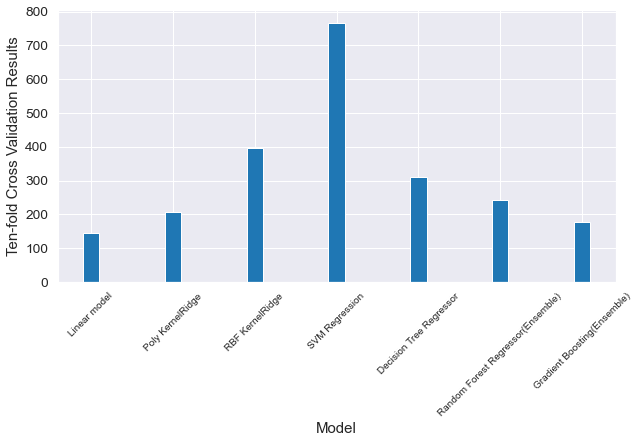

In [52]:
fig = plt.figure(figsize=(10,5))

plt.bar(models.keys(), cv_results, width = 0.2)
plt.xlabel("Model")
plt.ylabel("Ten-fold Cross Validation Results")
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.savefig('models_filtered.png')
plt.show()

## 4. PCA Analysis on Filtered Variables

In [53]:
# First ignroe all categorical variables
train_features_filtered_scaled.iloc[:,:-6]

,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.12,V.13,V.15,V.17,V.19,V.20,V.21,V.25,V.26,V.27
343,-0.537888,-0.361930,-0.590104,-1.091291,-0.980349,-0.586552,-0.505618,-0.724825,-0.682578,-0.791000,-0.779843,-0.405306,0.609157,-0.759255,-0.692365,-0.773632,-0.990087
186,-0.729352,-0.645489,-0.320670,1.160800,-0.059620,0.365393,0.816837,1.107141,1.136087,1.356356,1.100631,-0.035678,-2.032004,1.358287,1.109420,1.058035,0.687311
27,0.788686,0.566080,0.165008,-0.246757,1.224378,-0.110579,0.279254,-0.753827,-0.732801,-0.821192,-0.851574,-0.626207,0.609157,-0.780299,-0.787797,-0.831889,-1.094224
290,-0.749866,-0.722823,-0.607292,-0.997454,-0.342673,1.317338,-0.946437,-0.932673,-1.003110,-0.936070,-0.941448,-0.800431,0.609157,-1.225131,-1.124230,-1.117715,-1.072170
73,0.392082,0.230965,0.594709,0.879289,1.012276,-0.110579,0.494287,-0.081945,-0.050700,-0.166629,-0.020340,-0.169938,0.609157,-0.161767,0.106498,0.103137,1.181753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.886626,-0.800157,-0.588710,-0.434431,-0.079451,1.317338,-0.398101,-0.462194,-0.305084,-0.468449,-0.298824,-0.479073,-0.051134,-0.461034,-0.275672,-0.296865,-0.386234
255,-0.599430,-0.516598,-0.280719,0.691615,-0.704433,-0.110579,0.171737,1.812859,1.575033,1.915866,1.881231,2.398612,-2.032004,1.692666,1.594719,1.656187,0.874588
72,-0.148121,-0.078371,-0.408933,-0.715943,0.604097,-0.586552,-0.441108,-0.932673,-1.003110,-0.936070,-0.941448,-0.800431,0.609157,-1.225131,-1.124230,-1.117715,-1.072170
235,-0.455832,-0.387708,-0.557353,-0.997454,-0.159667,-0.110579,-0.881927,-1.037403,-1.169706,-0.991718,-0.994191,-0.813424,0.609157,-1.106424,-1.234835,-1.262480,-1.038805


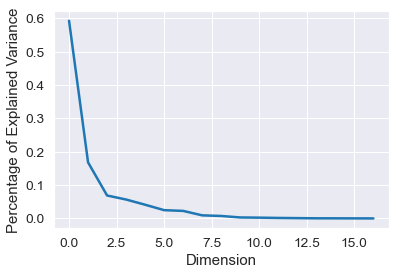

In [54]:
pca = PCA(n_components=17)
pca.fit(train_features_filtered_scaled.iloc[:,:-6])
plt.plot(pca.explained_variance_ratio_)
plt.xlabel(r'Dimension')
plt.ylabel(r'Percentage of Explained Variance');

In [55]:
n_components = 10

## Choose first n_components=10 Principal Components

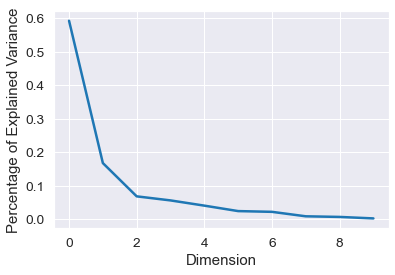

In [56]:
pca_final = PCA(n_components = n_components)
pca_final.fit(train_features_filtered_scaled.iloc[:,:-6])
plt.plot(pca_final.explained_variance_ratio_)
plt.xlabel(r'Dimension')
plt.ylabel(r'Percentage of Explained Variance');

Text(0.5, 1.0, 'Third Principal Component Axis')

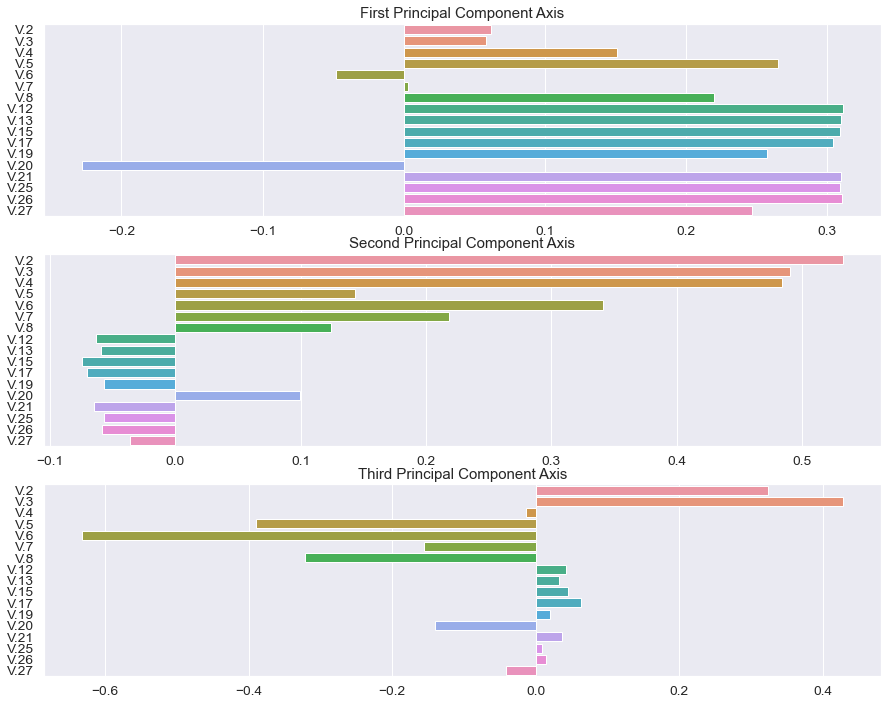

In [57]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
sns.barplot(x=pca_final.components_[0], y=train_features_filtered_scaled.iloc[:,:-6].columns, orient='h', ax=ax[0])
sns.barplot(x=pca_final.components_[1], y=train_features_filtered_scaled.iloc[:,:-6].columns, orient='h', ax=ax[1])
sns.barplot(x=pca_final.components_[2], y=train_features_filtered_scaled.iloc[:,:-6].columns, orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

In [58]:
latents_train = pca_final.transform(train_features_filtered_scaled.iloc[:,:-6])
latents_test = pca_final.transform(test_features_filtered_scaled.iloc[:,:-6])
latents_train_df = pd.DataFrame(latents_train, columns = ['PC'+str(i) for i in range(1,n_components+1)])
latents_test_df = pd.DataFrame(latents_test, columns =['PC'+str(i) for i in range(1,n_components+1)])

In [59]:
latent_train_features = pd.concat([latents_train_df, train_features_filtered_scaled.iloc[:,-6:].reset_index(drop=True)], axis=1)
latent_test_features = pd.concat([latents_test_df, test_features_filtered_scaled.iloc[:,-6:].reset_index(drop=True)], axis=1)

# Try Top 10 PC + Categorical Variables on various models （Filtered Variables）

In [60]:
models = {'Linear model':LinearRegression(),
                'Poly KernelRidge':KernelRidge( kernel = 'poly'),
                'RBF KernelRidge':KernelRidge( kernel = 'rbf'),
                'SVM Regression': SVR(kernel = 'linear'),
                'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
                'Random Forest Regressor(Ensemble)':RandomForestRegressor(random_state=0),
                'Gradient Boosting(Ensemble)': GradientBoostingRegressor(random_state=0)}


Linear model
Ten-fold Cross Validation Results= 204.3620
RMSE: 192.4480677031259 (Train) 319.20400723075477 (Test)
Poly KernelRidge
Ten-fold Cross Validation Results= 213.5994
RMSE: 68.76164774515426 (Train) 339.6511315722796 (Test)
RBF KernelRidge
Ten-fold Cross Validation Results= 450.8645
RMSE: 307.7832722335987 (Train) 868.1299067127997 (Test)
SVM Regression
Ten-fold Cross Validation Results= 766.0560
RMSE: 781.1672968383835 (Train) 813.2161457113507 (Test)
Decision Tree Regressor
Ten-fold Cross Validation Results= 412.2780
RMSE: 0.0 (Train) 479.01426561916367 (Test)
Random Forest Regressor(Ensemble)
Ten-fold Cross Validation Results= 301.9142
RMSE: 111.02524343650268 (Train) 278.5013154965939 (Test)
Gradient Boosting(Ensemble)
Ten-fold Cross Validation Results= 286.0027
RMSE: 70.90724414639756 (Train) 277.0818636736729 (Test)
[204.3620421468544, 213.59942519536426, 450.8644926459607, 766.0559856383716, 412.27798839187517, 301.9141640680494, 286.0026686901423]


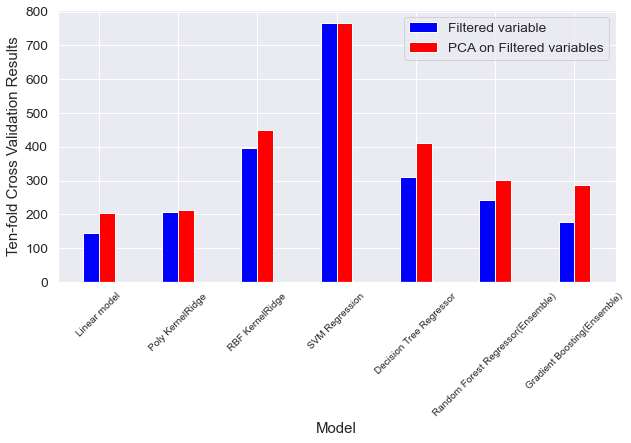

In [61]:
cv_results_pca = []
for name,model in models.items():
    print(name)
    model.fit(latent_train_features, train_target.iloc[:, 0])
    cv_results_pca.append(PrintPerformance(model, latent_train_features , train_target_filtered,latent_test_features, test_target_filtered, False))

print(cv_results_pca)
ind = np.arange(7)
fig = plt.figure(figsize=(10,5))

plt.bar(ind, cv_results, width = 0.2, color='b' , label="Filtered variable")
plt.bar(ind + 0.2, cv_results_pca, width=0.2, color='r', label = "PCA on Filtered variables")
plt.xlabel("Model")
plt.ylabel("Ten-fold Cross Validation Results")
plt.xticks(ind + 0.2 / 2, models.keys())
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.savefig('models_filtered_PCA.png')
plt.show()

# Final Model

Linear model
Ten-fold Cross Validation Results= 148.5834
RMSE: 129.50283941967402 (Train) 315.03855251997277 (Test)
Poly KernelRidge
Ten-fold Cross Validation Results= 197.4052
RMSE: 92.79290812422582 (Train) 417.2485334668635 (Test)
RBF KernelRidge
Ten-fold Cross Validation Results= 427.5954
RMSE: 308.1450477282373 (Train) 745.2940741943667 (Test)
SVM Regression
Ten-fold Cross Validation Results= 770.6402
RMSE: 787.6902617789463 (Train) 827.311384918436 (Test)
Decision Tree Regressor
Ten-fold Cross Validation Results= 296.9643
RMSE: 0.0 (Train) 338.2149218076182 (Test)
Random Forest Regressor(Ensemble)
Ten-fold Cross Validation Results= 244.5373
RMSE: 91.08164604239015 (Train) 258.6944538124722 (Test)
Gradient Boosting(Ensemble)
Ten-fold Cross Validation Results= 169.1533
RMSE: 29.360107881360005 (Train) 227.77146119404938 (Test)


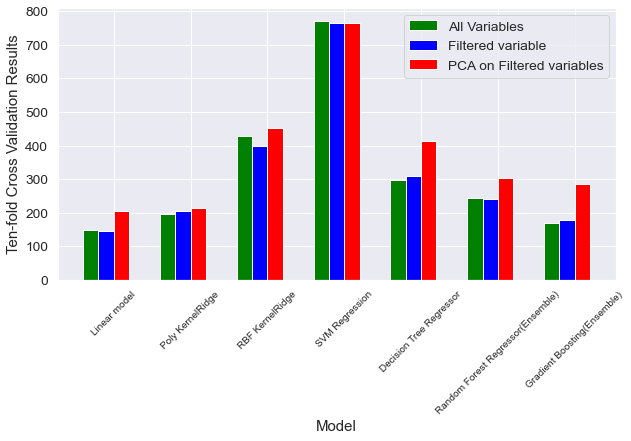

In [62]:
cv_results_original = []
for name,model in models.items():
    print(name)
    model.fit(train_features_scaled, train_target.iloc[:, 0])
    cv_results_original.append(PrintPerformance(model, train_features_scaled, train_target, test_features_scaled, test_target, False))
    
ind = np.arange(7)
fig = plt.figure(figsize=(10,5))

plt.bar(ind-0.2, cv_results_original, width=0.2, color='g', label="All Variables")
plt.bar(ind, cv_results, width = 0.2, color='b' , label="Filtered variable")
plt.bar(ind + 0.2, cv_results_pca, width=0.2, color='r', label = "PCA on Filtered variables")
plt.xlabel("Model")
plt.ylabel("Ten-fold Cross Validation Results")
plt.xticks(ind + 0.2 / 2, models.keys())
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.savefig('models_filtered_PCA.png')
plt.show()

## Linear Model

Ten-fold Cross Validation Results= 145.1876
RMSE: 131.24785313154325 (Train) 310.02928441256745 (Test)


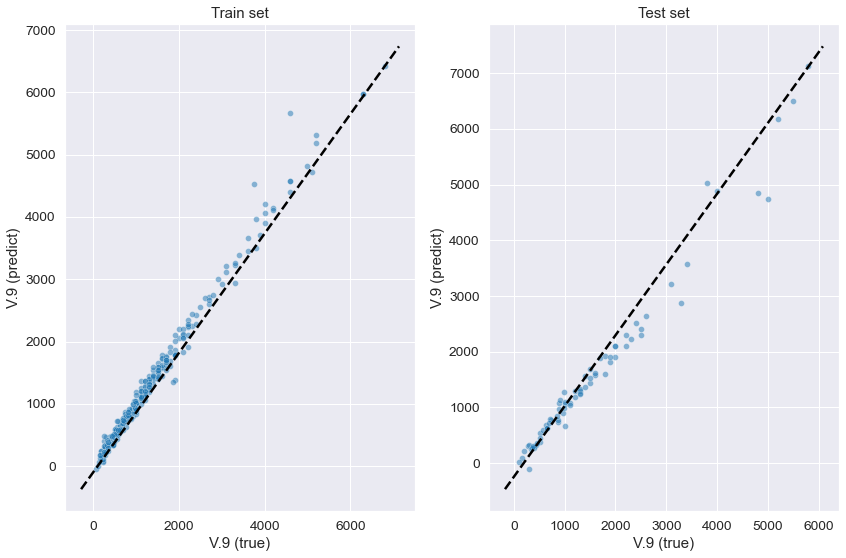

145.1876447792244

In [63]:
lm = LinearRegression()
lm.fit(train_features_filtered_scaled, train_target_filtered.iloc[:, 0])

PrintPerformance(lm, train_features_filtered_scaled, train_target_filtered, test_features_filtered_scaled, test_target_filtered)

In [64]:
lm.coef_

array([  -15.66726014,   -34.25290467,   111.14524074,   -60.60802032,
          -6.6546373 ,    87.73804339,  1135.26399357, -1120.99677807,
         628.87496497,   989.13658093,   -65.55576291,    54.4976418 ,
         -52.44588286,  -127.92815539,  1310.49727765, -1783.07029964,
         114.1585336 ,    30.24771602,   -30.24771602,    -6.37736293,
          -9.4620437 ,    32.84419562,   -17.00478898])

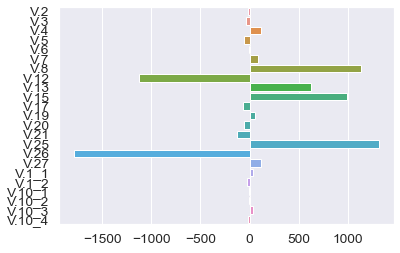

In [65]:
sns.barplot(x=lm.coef_, y=train_features_filtered_scaled.columns, orient='h')